[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shmouses/EELSpecNet/blob/main/article/evaluation/Evaluation.ipynb) 

**Evaluation of the EELSpecNet model**

In [18]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import os

Load model 
Because of the huge datasize, the model needs to be first downloaded

In [72]:
## redefine model for loading

class EELSpecNetModel_CNN_10D(tf.keras.Model):
    
    
    def __init__(self, ene_dim, **kwargs):
        super(EELSpecNetModel_CNN_10D, self).__init__(**kwargs)

        self.ene_dim = ene_dim  # Save to config // added by OM
        
        kerl_size = 4
 
        self.conv_1024x64 = tf.keras.layers.Conv2D(64, (1,kerl_size), strides = (1,2),
                                                   activation = 'relu', padding = 'same',
                                                   kernel_initializer='random_uniform')
 
        self.conv_512x128 = tf.keras.layers.Conv2D(128, (1,kerl_size), strides = (1,2),
                                                   activation = 'relu', padding = 'same',
                                                   kernel_initializer='random_uniform')
 
        self.conv_256x256 = tf.keras.layers.Conv2D(256, (1,kerl_size), strides = (1,2),
                                                   activation = 'relu',padding = 'same',
                                                   kernel_initializer='random_uniform')
 
        self.conv_128x512 = tf.keras.layers.Conv2D(512, (1,kerl_size), strides = (1,2),
                                                   activation = 'relu', padding = 'same',
                                                   kernel_initializer='random_uniform')
 
        self.conv_64x1024 = tf.keras.layers.Conv2D(1024, (1,kerl_size), strides = (1,2),
                                                   activation = 'relu', padding = 'same',
                                                   kernel_initializer='random_uniform')
 
        self.conv_32x2048 = tf.keras.layers.Conv2D(2048, (1,kerl_size), strides = (1,2),
                                                   activation = 'relu',padding = 'same',
                                                   kernel_initializer='random_uniform')
 
        self.conv_16x2048 = tf.keras.layers.Conv2D(2048, (1,kerl_size), strides = (1,2),
                                                   activation = 'relu', padding = 'same',
                                                   kernel_initializer='random_uniform')
 
        self.conv_8x2048 = tf.keras.layers.Conv2D(2048, (1,kerl_size), strides = (1,2),
                                                  activation = 'relu', padding = 'same',
                                                  kernel_initializer='random_uniform')
 
        self.conv_4x2048 = tf.keras.layers.Conv2D(2048, (1,kerl_size), strides = (1,2),
                                                  activation = 'relu',padding = 'same',
                                                  kernel_initializer='random_uniform')
 
        self.conv_2x2048 = tf.keras.layers.Conv2D(2048, (1,kerl_size), strides = (1,2),
                                                  activation = 'relu', padding = 'same',
                                                  kernel_initializer='random_uniform')
        
        #=======================================================================
 
        self.deconv_4x2048 = tf.keras.layers.Conv2DTranspose(2048, (1,kerl_size), strides = (1,2),
                                                             activation = 'relu', padding = 'same',
                                                             kernel_initializer='random_uniform')
 
        self.deconv_8x2048 = tf.keras.layers.Conv2DTranspose(2048, (1,kerl_size), strides = (1,2),
                                                             activation = 'relu', padding = 'same',
                                                             kernel_initializer='random_uniform')
 
        self.deconv_16x2048 = tf.keras.layers.Conv2DTranspose(2048, (1,kerl_size), strides = (1,2),
                                                              activation = 'relu', padding = 'same',
                                                              kernel_initializer='random_uniform')
 
        self.deconv_32x2048 = tf.keras.layers.Conv2DTranspose(2048, (1,kerl_size), strides = (1,2),
                                                              activation = 'relu', padding = 'same',
                                                              kernel_initializer='random_uniform')
 
        self.deconv_64x1024 = tf.keras.layers.Conv2DTranspose(1024, (1,kerl_size), strides = (1,2),
                                                              activation = 'relu', padding = 'same',
                                                              kernel_initializer='random_uniform')
 
        self.deconv_128x512 = tf.keras.layers.Conv2DTranspose(512, (1,kerl_size), strides = (1,2),
                                                              activation = 'relu', padding = 'same',
                                                              kernel_initializer='random_uniform')
 
        self.deconv_256x256 = tf.keras.layers.Conv2DTranspose(256, (1,kerl_size), strides = (1,2),
                                                              activation = 'relu', padding = 'same',
                                                              kernel_initializer='random_uniform')
        
        self.deconv_512x128 = tf.keras.layers.Conv2DTranspose(128, (1,kerl_size), strides = (1,2),
                                                              activation = 'relu', padding = 'same',
                                                              kernel_initializer='random_uniform')
        
        self.deconv_1024x64 = tf.keras.layers.Conv2DTranspose(64, (1,kerl_size), strides = (1,2),
                                                              activation = 'relu', padding = 'same',
                                                              kernel_initializer='random_uniform')
        
        self.deconv_2048x1 = tf.keras.layers.Conv2DTranspose(1, (1,kerl_size), strides = (1,2),
                                                             activation = 'tanh', padding = 'same',
                                                             kernel_initializer='random_uniform')
        
        self.concat = tf.keras.layers.concatenate
        self.relu = tf.keras.activations.relu
        
    
    
    def call(self, inputs):
        
        enc_1024x64 = self.conv_1024x64(inputs)
        
        enc_512x128 = self.conv_512x128(enc_1024x64)
        
        enc_256x256 = self.conv_256x256(enc_512x128)
        
        enc_128x512 = self.conv_128x512(enc_256x256)
        
        enc_64x1024 = self.conv_64x1024(enc_128x512)
        
        enc_32x2048 = self.conv_32x2048(enc_64x1024)
        
        enc_16x2048 = self.conv_16x2048(enc_32x2048)
        
        enc_8x2048 = self.conv_8x2048(enc_16x2048)
        
        enc_4x2048 = self.conv_4x2048(enc_8x2048)
                
        enc_2x2048 = self.conv_2x2048(enc_4x2048)
        
        #=======================================================================
 
        dcd_4x2048 = self.deconv_4x2048(enc_2x2048)  
        dcd_4x2048x2 = self.concat([dcd_4x2048, enc_4x2048], axis=-1)
        
        dcd_8x2048 = self.deconv_8x2048(dcd_4x2048x2)
        dcd_8x2048x2 = self.concat([dcd_8x2048, enc_8x2048], axis=-1)
                
        dcd_16x2048 = self.deconv_16x2048(dcd_8x2048x2)
        dcd_16x2048x2 = self.concat([dcd_16x2048, enc_16x2048], axis=-1)
        
        dcd_32x2048 = self.deconv_32x2048(dcd_16x2048x2)
        dcd_32x2048x2 = self.concat([dcd_32x2048, enc_32x2048], axis=-1)
        
        dcd_64x1024 = self.deconv_64x1024(dcd_32x2048x2)
        dcd_64x1024x2 = self.concat([dcd_64x1024, enc_64x1024], axis=-1)
        
        dcd_128x512 = self.deconv_128x512(dcd_64x1024x2)
        dcd_128x512x2 = self.concat([dcd_128x512, enc_128x512], axis=-1)
        
        dcd_256x256 = self.deconv_256x256(dcd_128x512x2)
        dcd_256x256x2 = self.concat([dcd_256x256, enc_256x256], axis=-1)
        
        dcd_512x128 = self.deconv_512x128(dcd_256x256x2)
        dcd_512x128x2 = self.concat([dcd_512x128, enc_512x128], axis=-1)
        
        dcd_1024x64 = self.deconv_1024x64(dcd_512x128x2)
        dcd_1024x64x2 = self.concat([dcd_1024x64, enc_1024x64], axis=-1)
        
        dcd_2048x1 = self.deconv_2048x1(dcd_1024x64x2)
 
        
        return(dcd_2048x1)

    def get_config(self):
        config = super().get_config()
        config.update({
            'ene_dim': self.ene_dim
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [19]:
## ChatGPT small version

class EELSpecNetModel_CNN_10D_Small(tf.keras.Model):
    def __init__(self, ene_dim, **kwargs):
        super(EELSpecNetModel_CNN_10D_Small, self).__init__(**kwargs)
        self.ene_dim = ene_dim
        
        kerl_size = 4

        # Encoder
        self.conv_1024x32 = tf.keras.layers.Conv2D(32, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.conv_512x64 = tf.keras.layers.Conv2D(64, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.conv_256x128 = tf.keras.layers.Conv2D(128, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.conv_128x256 = tf.keras.layers.Conv2D(256, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.conv_64x512 = tf.keras.layers.Conv2D(512, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.conv_32x512 = tf.keras.layers.Conv2D(512, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.conv_16x512 = tf.keras.layers.Conv2D(512, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.conv_8x512 = tf.keras.layers.Conv2D(512, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.conv_4x512 = tf.keras.layers.Conv2D(512, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.conv_2x512 = tf.keras.layers.Conv2D(512, (1, kerl_size), strides=(1,2), activation='relu', padding='same')

        # Decoder
        self.deconv_4x512 = tf.keras.layers.Conv2DTranspose(512, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.deconv_8x512 = tf.keras.layers.Conv2DTranspose(512, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.deconv_16x512 = tf.keras.layers.Conv2DTranspose(512, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.deconv_32x512 = tf.keras.layers.Conv2DTranspose(512, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.deconv_64x512 = tf.keras.layers.Conv2DTranspose(512, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.deconv_128x256 = tf.keras.layers.Conv2DTranspose(256, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.deconv_256x128 = tf.keras.layers.Conv2DTranspose(128, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.deconv_512x64 = tf.keras.layers.Conv2DTranspose(64, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.deconv_1024x32 = tf.keras.layers.Conv2DTranspose(32, (1, kerl_size), strides=(1,2), activation='relu', padding='same')
        self.deconv_2048x1 = tf.keras.layers.Conv2DTranspose(1, (1, kerl_size), strides=(1,2), activation='tanh', padding='same')

        self.concat = tf.keras.layers.concatenate

    def call(self, inputs):
        enc_1024x32 = self.conv_1024x32(inputs)
        enc_512x64 = self.conv_512x64(enc_1024x32)
        enc_256x128 = self.conv_256x128(enc_512x64)
        enc_128x256 = self.conv_128x256(enc_256x128)
        enc_64x512 = self.conv_64x512(enc_128x256)
        enc_32x512 = self.conv_32x512(enc_64x512)
        enc_16x512 = self.conv_16x512(enc_32x512)
        enc_8x512 = self.conv_8x512(enc_16x512)
        enc_4x512 = self.conv_4x512(enc_8x512)
        enc_2x512 = self.conv_2x512(enc_4x512)

        dcd_4x512 = self.deconv_4x512(enc_2x512)
        dcd_4x512x2 = self.concat([dcd_4x512, enc_4x512], axis=-1)

        dcd_8x512 = self.deconv_8x512(dcd_4x512x2)
        dcd_8x512x2 = self.concat([dcd_8x512, enc_8x512], axis=-1)

        dcd_16x512 = self.deconv_16x512(dcd_8x512x2)
        dcd_16x512x2 = self.concat([dcd_16x512, enc_16x512], axis=-1)

        dcd_32x512 = self.deconv_32x512(dcd_16x512x2)
        dcd_32x512x2 = self.concat([dcd_32x512, enc_32x512], axis=-1)

        dcd_64x512 = self.deconv_64x512(dcd_32x512x2)
        dcd_64x512x2 = self.concat([dcd_64x512, enc_64x512], axis=-1)

        dcd_128x256 = self.deconv_128x256(dcd_64x512x2)
        dcd_128x256x2 = self.concat([dcd_128x256, enc_128x256], axis=-1)

        dcd_256x128 = self.deconv_256x128(dcd_128x256x2)
        dcd_256x128x2 = self.concat([dcd_256x128, enc_256x128], axis=-1)

        dcd_512x64 = self.deconv_512x64(dcd_256x128x2)
        dcd_512x64x2 = self.concat([dcd_512x64, enc_512x64], axis=-1)

        dcd_1024x32 = self.deconv_1024x32(dcd_512x64x2)
        dcd_1024x32x2 = self.concat([dcd_1024x32, enc_1024x32], axis=-1)

        dcd_2048x1 = self.deconv_2048x1(dcd_1024x32x2)

        return dcd_2048x1

    def get_config(self):
        config = super().get_config()
        config.update({'ene_dim': self.ene_dim})
        return config


In [20]:
pathToModelOnMasc = '//masc_shared/ag_volz/Oliver_Maßmeyer/EELS/EELSpecNet/models'

## load own model --> needs large GPU node for loading?
# model = tf.keras.models.load_model(os.path.join(pathToModelOnMasc,"general_small_6000_1000epochs.keras"),custom_objects={'EELSpecNetModel_CNN_10D_Small': EELSpecNetModel_CNN_10D_Small}, compile=True) # load with compile false to save storage

## load own model --> needs large GPU node for loading?
model = tf.keras.models.load_model(os.path.join(pathToModelOnMasc,"general_small_6000_1000epochs.keras"),custom_objects={'EELSpecNetModel_CNN_10D_Small': EELSpecNetModel_CNN_10D_Small}, compile=True) # load with compile false to save storage

## load own model --> needs large GPU node for loading?
# model = tf.keras.models.load_model("../model/general_small_6000_1000epochs.keras",custom_objects={'EELSpecNetModel_CNN_10D_Small': EELSpecNetModel_CNN_10D_Small}, compile=True) # load with compile false to save storage


In [10]:
model

<EELSpecNetModel_CNN_10D name=eel_spec_net_model_cnn_10d_1, built=True>

In [13]:
import os

In [23]:
os.path.exists("../model/general_6000_1epochs.keras")

True

Load data for model evaluation  

In this notebook, it is assumed that the training data ("original_eval_general_2000.npy" and "convolved_eval_general_2000.npy" files) are already available in the evaluation folder. 

If needed the evaluation data can be generated in the evaluation folder executing the Generate_Evaluation_Set.ipynb notebook

In [21]:
original = np.load("original_eval_general_2000.npy")
conv = np.load("convolved_eval_general_2000.npy")

Data preparation

In [22]:
original += 0.001
conv += 0.001

original = original.reshape((2000, 1, 2048, 1))
conv = conv.reshape((2000,1,2048,1))

Evaluation of the model with the target

In [23]:
history = model.evaluate(conv, original)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0097 - mape: 0.7504 - mse: 2.5827e-09


Deconvolution of the evaluation data using EELSpecNet

In [24]:
prediction = model.predict(conv)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


Save the deconvoluted data

In [25]:
prediction = prediction.reshape((2000,2048))
np.save("deconv_eval_lw_general_2000.npy", prediction)

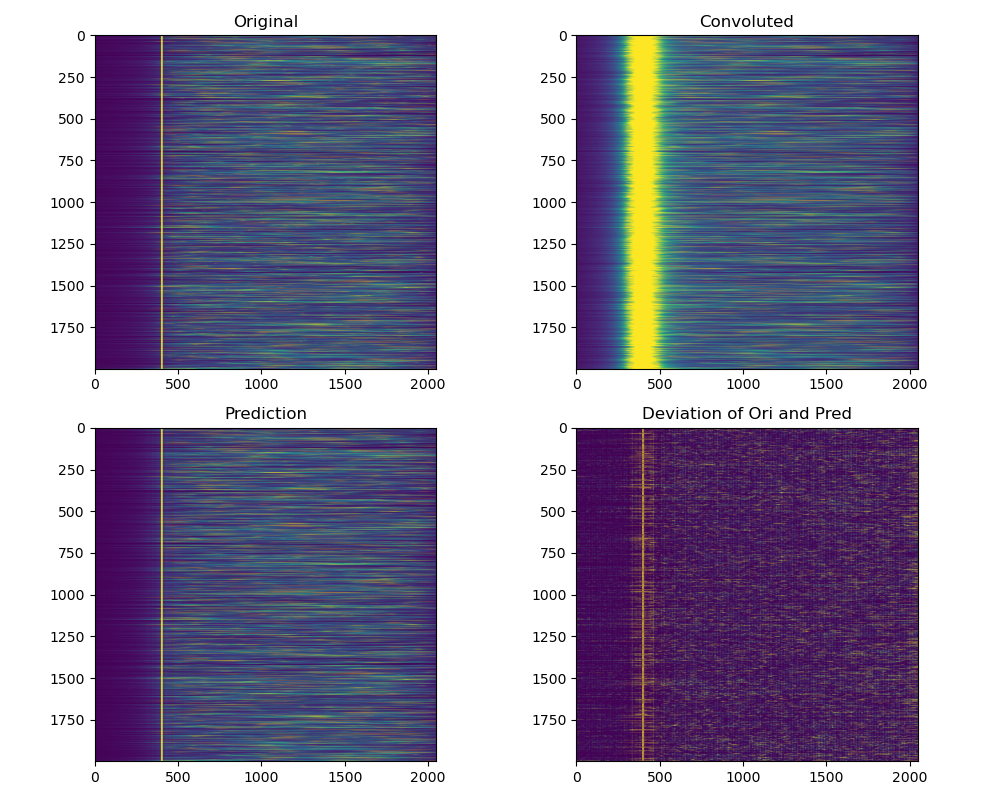

In [26]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

vminVal = 0.001
vmaxVal = 0.0015

# Top-left plot
axs[0, 0].imshow(original.reshape(2000,2048),vmin=vminVal,vmax=vmaxVal)
axs[0, 0].set_title('Original')

# Top-right plot
axs[0, 1].imshow(conv.reshape(2000,2048),vmin=vminVal,vmax=vmaxVal)
axs[0, 1].set_title('Convoluted')

# Bottom-left plot
axs[1, 0].imshow(prediction.reshape(2000,2048),vmin=vminVal,vmax=vmaxVal)
axs[1, 0].set_title('Prediction')

# Bottom-right plot
axs[1, 1].imshow(original.reshape(2000,2048)-prediction.reshape(2000,2048),vmin=1e-5,vmax=2e-5)
axs[1, 1].set_title('Deviation of Ori and Pred')

# Adjust layout
plt.tight_layout()
plt.show()

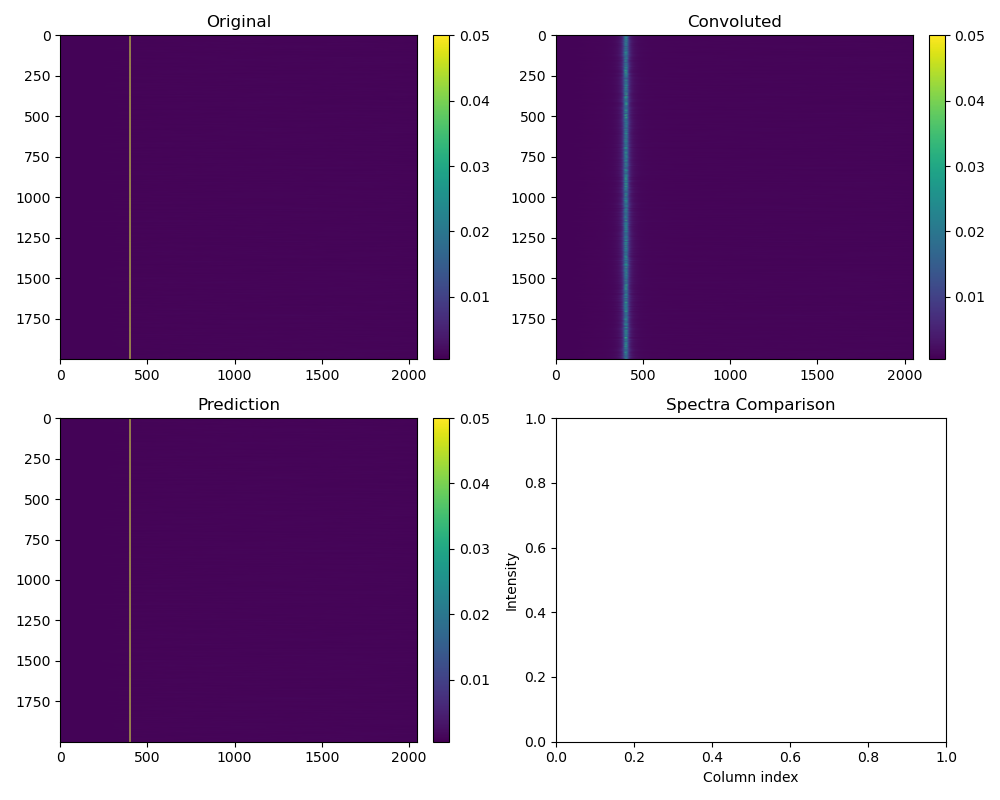

In [27]:
## plot individual spectra parts of the data
# Call it

vminVal = 0.0005
vmaxVal = 0.05

plot_interactive_spectra(original.reshape(2000, 2048), 
                         conv.reshape(2000, 2048), 
                         prediction.reshape(2000, 2048),vminVal=vminVal,vmaxVal=vmaxVal)

In [14]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

# # Example data if you want to test
# original = np.random.rand(2000, 2048)
# conv = np.random.rand(2000, 2048)
# prediction = np.random.rand(2000, 2048)

def plot_interactive_spectra(original, conv, prediction, vminVal=0.001, vmaxVal=0.0015):

    """
    Display 2D array images and enable interactive row selection for spectral comparison.

    Parameters
    ----------
    original : np.ndarray
        A 2D numpy array representing the original data (e.g., shape (rows, columns)).
        
    conv : np.ndarray
        A 2D numpy array representing the convoluted data (same shape as `original`).
        
    prediction : np.ndarray
        A 2D numpy array representing the predicted data (same shape as `original`).
        
    vminVal : float, optional
        Minimum value for colormap normalization (default is 0.001).
        
    vmaxVal : float, optional
        Maximum value for colormap normalization (default is 0.0015).

    Description
    -----------
    This function plots the three 2D arrays (original, convoluted, prediction) 
    as images in a 2x2 grid of subplots. The bottom-right subplot displays 
    the spectral comparison (row data from all three arrays) at a user-selected row.
    
    Clicking on any of the 2D image plots updates the spectra plot 
    for the corresponding row.

    Notes
    -----
    Requires `%matplotlib widget` (ipympl) in Jupyter for interactivity.
    """
    
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    ims = []
    ims.append(axs[0, 0].imshow(original, vmin=vminVal, vmax=vmaxVal, aspect='auto'))
    axs[0, 0].set_title('Original')
    fig.colorbar(ims[0], ax=axs[0, 0], fraction=0.046, pad=0.04)

    ims.append(axs[0, 1].imshow(conv, vmin=vminVal, vmax=vmaxVal, aspect='auto'))
    axs[0, 1].set_title('Convoluted')
    fig.colorbar(ims[1], ax=axs[0, 1], fraction=0.046, pad=0.04)

    ims.append(axs[1, 0].imshow(prediction, vmin=vminVal, vmax=vmaxVal, aspect='auto'))
    axs[1, 0].set_title('Prediction')
    fig.colorbar(ims[2], ax=axs[1, 0], fraction=0.046, pad=0.04)

    axs[1, 1].set_title('Spectra Comparison')
    axs[1, 1].set_xlabel('Column index')
    axs[1, 1].set_ylabel('Intensity')

    plt.tight_layout()

    def onclick(event):
        if event.inaxes in axs.flatten() and event.ydata is not None:
            y = int(event.ydata)
            print(f"Selected row: {y}")

            x_vals = np.arange(original.shape[1])
            axs[1, 1].cla()

            axs[1, 1].plot(x_vals, original[y, :], label='Original')
            axs[1, 1].plot(x_vals, conv[y, :], label='Convoluted')
            axs[1, 1].plot(x_vals, prediction[y, :], label='Prediction')

            axs[1, 1].set_title(f'Spectra at row {y}')
            axs[1, 1].set_xlabel('Column index')
            axs[1, 1].set_ylabel('Intensity')
            axs[1, 1].set_yscale('log')
            axs[1, 1].legend()
            axs[1, 1].grid(True)

            fig.canvas.draw_idle()

    fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show()


